In [7]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units

import cartopy.crs as ccrs
import pickle
#import Tracking_Functions

import os

import src.Tracking_Functions as Tracking_Functions
from src.DataLoader import * 
from src.utils import * 
from src.Corrections import * 
from src.Enumerations import Month, Season
from src.xarray_util import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
input_path = '/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control_test/'
type_='IVT'
input_file_name_temp = 'MOAPP_ICON_control_CNRMforc_100and85controlperc_3dx3dy'

input_field_grid= '/work/aa0238/a271093/data/input/IVT_85_percentiles_CNMR_control_3dx3dy.nc'
first_year = 1984
last_year = 2000
#last_year = 1985
num_years = last_year-first_year

In [126]:
grid_field = xr.open_dataset(input_field_grid, cache = True)


rLon = xr.broadcast(grid_field.rlon, grid_field.rlat)[0].values.T
rLat = xr.broadcast(grid_field.rlon, grid_field.rlat)[1].values.T

regular_Lon = grid_field.lon.values
regular_Lat = grid_field.lat.values

In [127]:
#with open('/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control_test/IVT_MOAPP_ICON_control_CNRMforc_100and85controlperc_3dx3dy_1984_01_01-1984_07_01_corrected.pkl', 'rb') as pickle_file:
#    IVT_pkl = pickle.load(pickle_file)
#Lat,Lon=get_coordinates('10', IVT_pkl)
#ak.Array(list(v.values))
#IVTobj_ls.sort(reverse=True,key= lambda x: getattr(x.get,'duration'))
#IVTobj_ls.sortby('duration',reverse=True)
#IVTobj_ls[0].get.duration
#a=IVTobj_ls.sel_season(season=Season.ALL)#.sortby('duration',reverse=True)
#a.sortby('duration',reverse=True)
#with open('/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control_test/IVT_MOAPP_ICON_control_CNRMforc_100and85controlperc_3dx3dy_1984_01_01-1984_07_01_corrected.pkl', 'rb') as pickle_file:
#    IVT_pkl = pickle.load(pickle_file)
#IVT_pkl['1']
rLat

array([[-24.2, -24.2, -24.2, ..., -24.2, -24.2, -24.2],
       [-23.9, -23.9, -23.9, ..., -23.9, -23.9, -23.9],
       [-23.6, -23.6, -23.6, ..., -23.6, -23.6, -23.6],
       ...,
       [ 33.1,  33.1,  33.1, ...,  33.1,  33.1,  33.1],
       [ 33.4,  33.4,  33.4, ...,  33.4,  33.4,  33.4],
       [ 33.7,  33.7,  33.7, ...,  33.7,  33.7,  33.7]], dtype=float32)

In [128]:
def convert_to_regcoord(rlat, rlon):
    lat_idx = np.argwhere(rLat ==rlat)[0,0]
    lon_idx = np.argwhere(rLon ==rlon)[0,1]
    
    lat = regular_Lat[lat_idx,lon_idx]
    lon = regular_Lon[lat_idx,lon_idx]

    return lat,lon

In [129]:
IVTobj_ls[0].get.nc_file
dd=xr.open_dataset(IVTobj_ls[0].get.nc_file)

rLon = xr.broadcast(dd.rlon, dd.rlat)[0].values.T


In [130]:


start_date_list, end_date_list = create_datetime_lists(first_year,last_year, months=6, correct_last_endtime=False) 
#start_date_list_nc, end_date_list_nc = create_datetime_lists(first_year,last_year, months=7, correct_last_endtime=False) 

first_processed_date = start_date_list[0]
last_processed_date = end_date_list[-1]


In [131]:
IVTobj_ls=Object_container([])


for start_date, end_date in zip(start_date_list, end_date_list):
    print(start_date)
    pickle_file_path = f'{input_path}{type_}_{input_file_name_temp}_{get_datetime_str(start_date)}-{get_datetime_str(end_date)}_corrected'
    
    dict_ = get_dict_from_pkl(pickle_file_path)
    

    for object_id in dict_.keys():
        try:
            ds = create_obj_from_dict(dict_,
                                      object_id,
                                      input_path,
                                      input_file_name_temp,
                                      start_date,
                                      end_date,
                                      input_field_grid = input_field_grid,
                                      load_coordinates=False
                                  
                                     )
        except ValueError as ex:
            #print (object_id)
            #print ("start=",dict_[object_id]['times'][0])
            #print ("end=",dict_[object_id]['times'][-1])

            #print(ex)
            continue
        
        IVTobj_ls.append(ds)
    

    

        
    IVTobj_ls.append(ds)
    
    
    

1984-01-01 00:00:00
1984-07-01 00:00:00
1985-01-01 00:00:00
1985-07-01 00:00:00
1986-01-01 00:00:00
1986-07-01 00:00:00
1987-01-01 00:00:00
1987-07-01 00:00:00
1988-01-01 00:00:00
1988-07-01 00:00:00
1989-01-01 00:00:00
1989-07-01 00:00:00
1990-01-01 00:00:00
1990-07-01 00:00:00
1991-01-01 00:00:00
1991-07-01 00:00:00
1992-01-01 00:00:00
1992-07-01 00:00:00
1993-01-01 00:00:00
1993-07-01 00:00:00
1994-01-01 00:00:00
1994-07-01 00:00:00
1995-01-01 00:00:00
1995-07-01 00:00:00
1996-01-01 00:00:00
1996-07-01 00:00:00
1997-01-01 00:00:00
1997-07-01 00:00:00
1998-01-01 00:00:00
1998-07-01 00:00:00
1999-01-01 00:00:00
1999-07-01 00:00:00


# Total number of IVT-object occurrences per season over domain

Text(0.5, 1.0, 'Total count of IVT occurrences over entire domain')

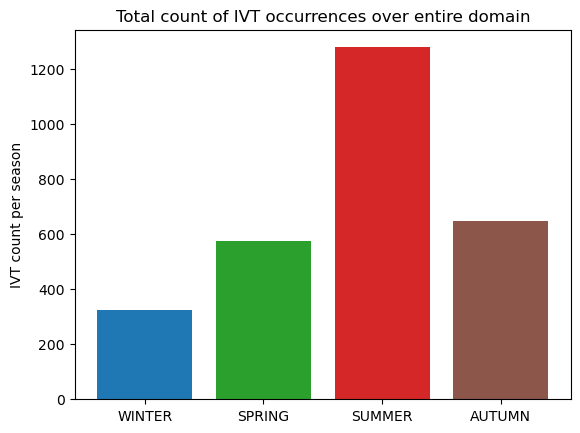

In [132]:
fig, ax = plt.subplots()

seasons = [x.name for x in Season]
bar_labels = ['red', 'blue', '_green', 'brown','ff']
bar_colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:brown','tab:gray']

counts=[]
for season_ in Season:
    counts.append((IVTobj_ls.sel_season(season=season_).count())/num_years)

    
ax.bar(seasons, counts, color=bar_colors)

ax.set_ylabel('IVT count per season')
ax.set_title('Total count of IVT occurrences over entire domain')
#plt.grid()
#ax.legend(title='Season')

# Duration of IVT-objects

(9.0, 90.0)

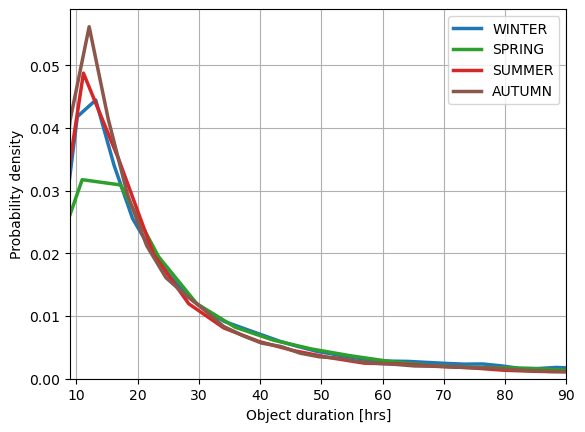

In [133]:
import seaborn as sns
fig, ax = plt.subplots()
bar_labels = ['red', 'blue', '_green', 'brown','ff']
bar_colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:brown','tab:gray']

for i,season_ in enumerate(Season):

    #dat=IVTobj_ls.sel_season(season=Season.WINTER).get_attributes(attr='duration')##obj_means("size")
    dat=IVTobj_ls.sel_season(season=season_).get_attributes(attr='duration')##obj_means("size")

    sns.kdeplot(dat,label=season_.name,color=bar_colors[i],lw=2.5,bw_adjust=0.3)
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('Object duration [hrs]')
ax.set_ylabel('Probability density')
plt.legend()
plt.grid()
ax.set_xlim(9,90)


# Size of IVT-objects

(0.0, 150000.0)

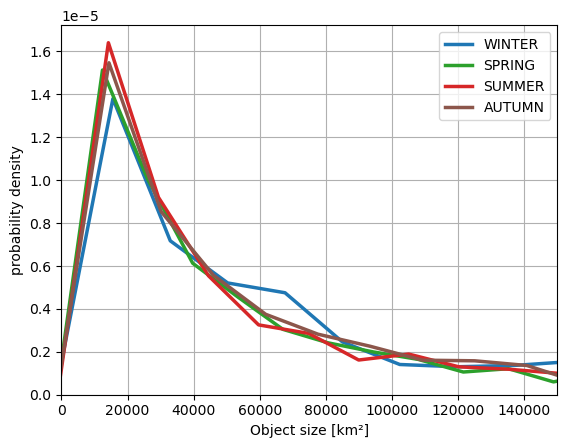

In [150]:
fig, ax = plt.subplots()

for i,season_ in enumerate(Season):

    #fig, ax = plt.subplots()

    dat=IVTobj_ls.sel_season(season=season_).obj_means(attr='size')##obj_means("size")
    sns.kdeplot(dat,label=season_.name,color=bar_colors[i],lw=2.5,bw_adjust=0.01)
   # sns.histplot(dat,label=season_.name,color=bar_colors[i],lw=2.5)
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('Object size [km²]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,150000)

(-10000.0, 100000.0)

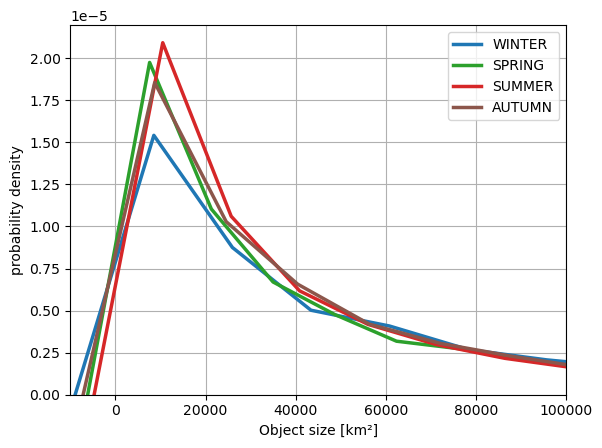

In [148]:
fig, ax = plt.subplots()

for i,season_ in enumerate(Season):

    #fig, ax = plt.subplots()

    dat=IVTobj_ls.sel_season(season=season_).obj_means(attr='size')##obj_means("size")
    sns.kdeplot(dat,label=season_.name,color=bar_colors[i],lw=2.5,bw_adjust=0.05, cut)
   # sns.histplot(dat,label=season_.name,color=bar_colors[i],lw=2.5)
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('Object size [km²]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(-10000,100000)

# Total IVT content of IVT-objects

(0.0, 26000.0)

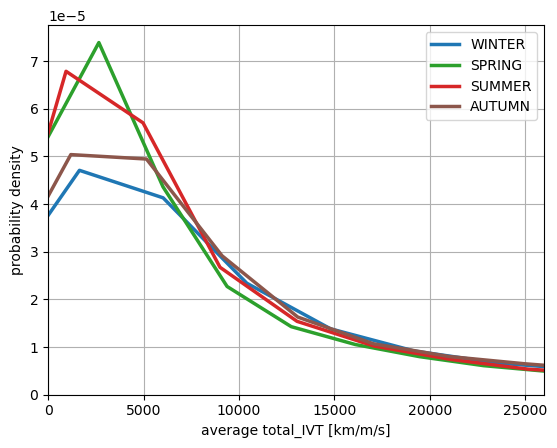

In [135]:
fig, ax = plt.subplots()

for i,season_ in enumerate(Season):

    #fig, ax = plt.subplots()

    dat=IVTobj_ls.sel_season(season=season_).obj_means(attr='total_IVT')##obj_means("size")
    sns.kdeplot(dat,label=season_.name,color=bar_colors[i],lw=2.5,bw_adjust=0.3)
   # sns.histplot(dat,label=season_.name,color=bar_colors[i],lw=2.5)
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('average total_IVT [km/m/s]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,26000)

# Average speed of IVT-objects

(0.0, 70.0)

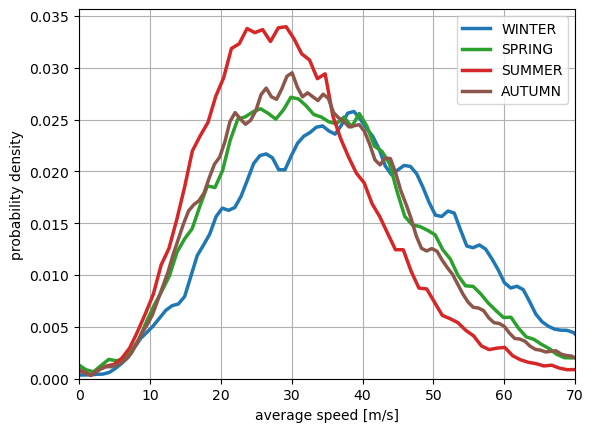

In [136]:
fig, ax = plt.subplots()

for i,season_ in enumerate(Season):

    #fig, ax = plt.subplots()

    dat=IVTobj_ls.sel_season(season=season_).obj_means(attr='speed')##obj_means("size")
    sns.kdeplot(dat,label=season_.name,color=bar_colors[i],lw=2.5,bw_adjust=0.3)
   # sns.histplot(dat,label=season_.name,color=bar_colors[i],lw=2.5)
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('average speed [m/s]')
ax.set_ylabel('probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,70)

In [31]:
#a=IVTobj_ls.sel_season(season=Season.SUMMER).sortby('duration',reverse=True)

In [32]:
2

2

/tmp/ipykernel_3696960/1920066277.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=np.array(dat1),y=np.array(dat2),label=season_.name,color=bar_colors[i],shade=True,bw_adjust=0.3, clip =((0,80),(0,0.5e5)))
/tmp/ipykernel_3696960/1920066277.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=np.array(dat1),y=np.array(dat2),label=season_.name,color=bar_colors[i],shade=True,bw_adjust=0.3, clip =((0,80),(0,0.5e5)))
/tmp/ipykernel_3696960/1920066277.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=np.array(dat1),y=np.array(dat2),label=season_.name,color=bar_colors[i],shade=True,bw_adjust=0.3, clip =((0,80),(0,0.5e

(0.0, 200.0)

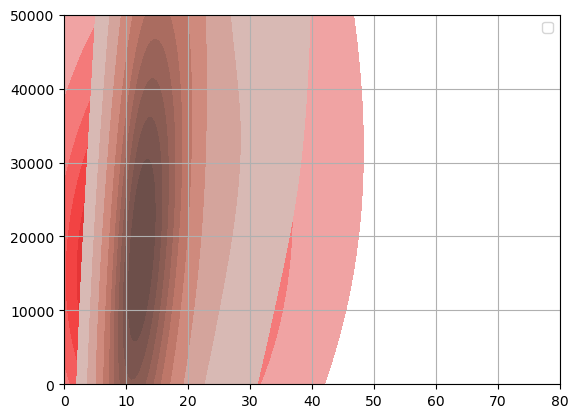

In [68]:
for i,season_ in enumerate(Season):

    #dat=IVTobj_ls.sel_season(season=Season.WINTER).get_attributes(attr='duration')##obj_means("size")
    dat1=IVTobj_ls.sel_season(season=season_).get_attributes(attr='duration')##obj_means("size")
    dat2=IVTobj_ls.sel_season(season=season_).obj_means(attr='size')##obj_means("size")


    sns.kdeplot(x=np.array(dat1),y=np.array(dat2),label=season_.name,color=bar_colors[i],shade=True,bw_adjust=0.3, clip =((0,80),(0,0.5e5)))
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('Object duration [hrs]')
ax.set_ylabel('Probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,200)


/tmp/ipykernel_3696960/3635372108.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=np.array(dat1),y=np.array(dat2),label=season_.name,color=bar_colors[i],shade=True,bw_adjust=0.3, clip =((9,80),(0,0.5e5)))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 200.0)

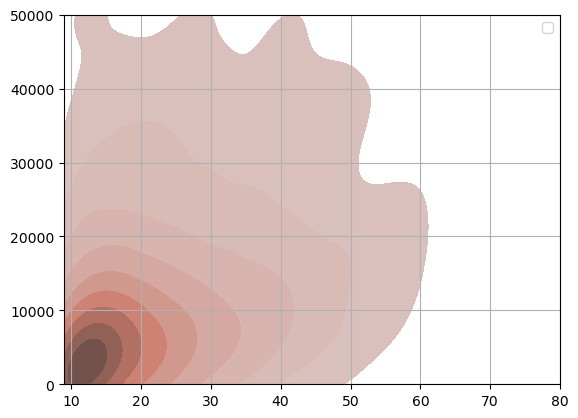

In [137]:

dat1=IVTobj_ls.sel_season(season=Season.WINTER).get_attributes(attr='duration')##obj_means("size")
dat2=IVTobj_ls.sel_season(season=Season.WINTER).obj_means(attr='total_IVT')##obj_means("size")


sns.kdeplot(x=np.array(dat1),y=np.array(dat2),label=season_.name,color=bar_colors[i],shade=True,bw_adjust=0.3, clip =((9,80),(0,0.5e5)))
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('Object duration [hrs]')
ax.set_ylabel('Probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,200)

/tmp/ipykernel_3696960/1065710837.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=np.array(dat1),y=np.array(dat2),label=season_.name,color=bar_colors[i],shade=True,bw_adjust=0.3, clip =((9,80),(0,0.5e5)))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 200.0)

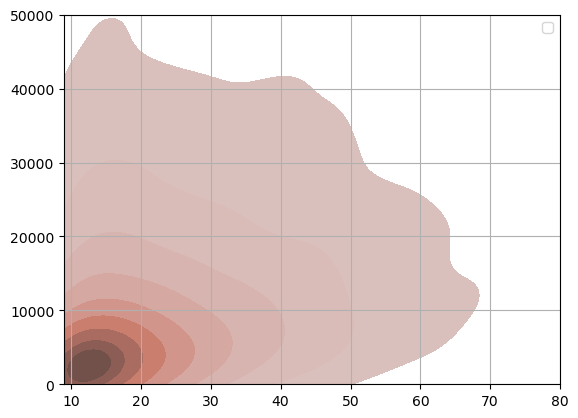

In [138]:

dat1=IVTobj_ls.sel_season(season=Season.SUMMER).get_attributes(attr='duration')##obj_means("size")
dat2=IVTobj_ls.sel_season(season=Season.SUMMER).obj_means(attr='total_IVT')##obj_means("size")


sns.kdeplot(x=np.array(dat1),y=np.array(dat2),label=season_.name,color=bar_colors[i],shade=True,bw_adjust=0.3, clip =((9,80),(0,0.5e5)))
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('Object duration [hrs]')
ax.set_ylabel('Probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,200)

In [79]:
float(IVTobj_ls[0].get.rlat_origin)

-20.899999618530273